In [2]:
from __future__ import print_function
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('../data/user_summary.csv')
df

,user_id,total_orders,total_products,min_products,max_products,med_products,avg_products,std_products,max_reordered,med_reordered,...,per_prod_19,per_prod_20,per_prod_21,per_prod_22,per_prod_23,per_prod_morning,per_prod_lunch,per_prod_afternoon,per_prod_evening,per_prod_afterhours
0,1,11,70,4,11,6.0,6.363636,2.110579,1.000000,0.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.535398,0.393805,0.070796,0.000000,0.000000
1,2,15,226,5,31,14.0,15.066667,7.055562,0.888889,0.562500,...,0.102273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.568182,0.431818,0.000000
2,3,12,88,5,11,7.0,7.333333,2.103388,1.000000,0.763889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.611111,0.388889,0.000000,0.000000
3,4,5,18,2,7,3.0,3.600000,2.073644,0.142857,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.434783,0.195652,0.369565,0.000000
4,5,5,46,5,12,9.0,9.200000,2.683282,0.666667,0.444444,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,206205,4,51,7,19,12.5,12.750000,6.130525,0.857143,0.282895,...,0.147368,0.059649,0.000000,0.000000,0.000000,0.010526,0.084211,0.259649,0.645614,0.000000
206205,206206,67,285,1,24,4.0,4.253731,3.230270,1.000000,0.500000,...,0.107623,0.112108,0.022422,0.000000,0.000000,0.255605,0.273543,0.192825,0.242152,0.035874
206206,206207,16,223,5,25,13.0,13.937500,6.038419,1.000000,0.645833,...,0.038405,0.013294,0.000000,0.048744,0.005908,0.162482,0.155096,0.468242,0.125554,0.088626
206207,206208,49,677,4,28,13.0,13.816327,5.592679,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.175182,0.489051,0.116788,0.218978,0.000000


In [48]:
df[['total_prod_morning', 'total_prod_lunch', 'total_prod_afternoon','total_prod_evening',\
                  'total_prod_afterhours', 'total_prod_weekday', 'total_prod_weekend']]

,total_prod_morning,total_prod_lunch,total_prod_afternoon,total_prod_evening,total_prod_afterhours,total_prod_weekday,total_prod_weekend
0,121.0,89.0,16.0,0.0,0.0,131.0,95.0
1,0.0,0.0,50.0,38.0,0.0,26.0,62.0
2,0.0,11.0,7.0,0.0,0.0,18.0,0.0
3,0.0,20.0,9.0,17.0,0.0,16.0,30.0
4,0.0,0.0,7.0,7.0,0.0,14.0,0.0
...,...,...,...,...,...,...,...
206204,3.0,24.0,74.0,184.0,0.0,163.0,122.0
206205,57.0,61.0,43.0,54.0,8.0,152.0,71.0
206206,110.0,105.0,317.0,85.0,60.0,502.0,175.0
206207,24.0,67.0,16.0,30.0,0.0,90.0,47.0


In [4]:
kmeans = KMeans()

### Helper Function

In [26]:
def kmeans_model_(user_summary, list_of_columns):
    sample = user_summary[list_of_columns]

    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(sample)
        kmeanModel.fit(sample)
        distortions.append(sum(np.min(cdist(sample, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / sample.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.show()

#### Total Products || HOD Groups || DOW Groups 2

In [29]:
list_of_columns = ['total_prod_morning', 'total_prod_lunch', 'total_prod_afternoon','total_prod_evening',\
                  'total_prod_afterhours', 'total_prod_weekday', 'total_prod_weekend']

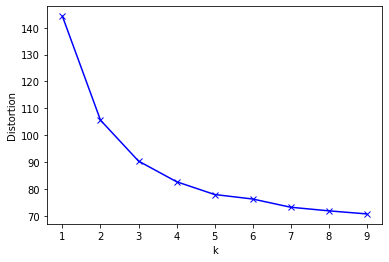

In [31]:
kmeans_model_(user_summary, list_of_columns)

#### Total Products || HOD Groups || DOW Groups 3

In [32]:
list_of_columns = ['total_prod_morning', 'total_prod_lunch', 'total_prod_afternoon','total_prod_evening',\
                  'total_prod_afterhours', 'total_prod_early_week', 'total_prod_late_week','total_prod_weekend']

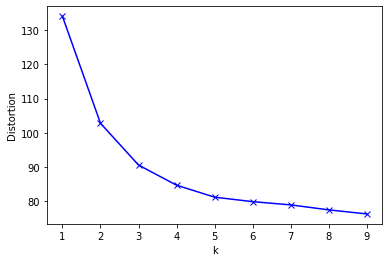

In [33]:
kmeans_model_(user_summary, list_of_columns)

#### Percent Products || HOD Groups || DOW Groups 2

In [37]:
list_of_columns = ['per_prod_morning', 'per_prod_lunch', 'per_prod_afternoon', 'per_prod_evening',\
                  'per_prod_afterhours', 'per_prod_weekday', 'per_prod_weekend']

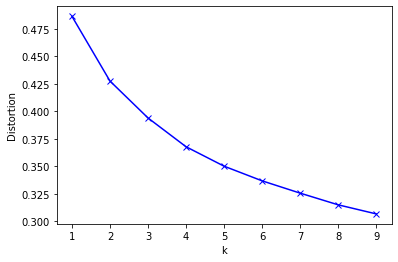

In [38]:
kmeans_model_(user_summary, list_of_columns)

#### Percent Products || HOD Groups || DOW Groups 3

In [39]:
list_of_columns = ['per_prod_morning', 'per_prod_lunch', 'per_prod_afternoon','per_prod_evening',\
                  'per_prod_afterhours', 'per_prod_early_week', 'per_prod_late_week','per_prod_weekend']

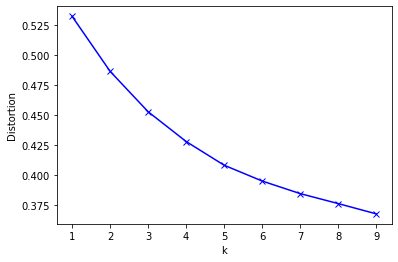

In [40]:
kmeans_model_(user_summary, list_of_columns)

#### DOW, HOD, total_orders, med_products, med_reordered, total_days

In [41]:
list_of_columns = ['total_prod_morning', 'total_prod_lunch', 'total_prod_afternoon','total_prod_evening',\
                   'total_prod_afterhours', 'total_prod_weekday', 'total_prod_weekend', 'total_orders',\
                   'med_products', 'med_reordered', 'total_days']

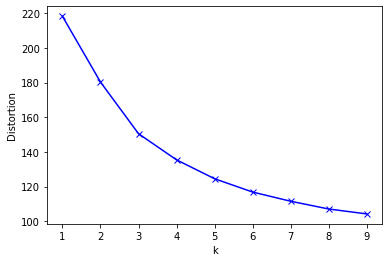

In [42]:
kmeans_model_(user_summary, list_of_columns)

#### Total Products || HOD Groups || DOW Groups 3 || med_reordered

In [43]:
list_of_columns = ['total_prod_morning', 'total_prod_lunch', 'total_prod_afternoon','total_prod_evening',\
                   'total_prod_afterhours', 'total_prod_weekday', 'total_prod_weekend', 'med_reordered']

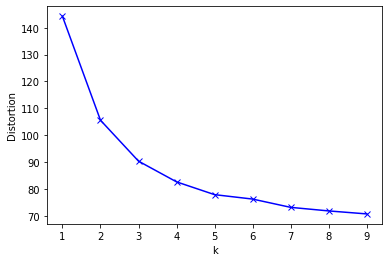

In [44]:
kmeans_model_(user_summary, list_of_columns)

In [45]:
kmeans.set_params(n_clusters=7)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
pd.Series(kmeans.labels_).value_counts()

3    29559
6    29541
1    29505
2    29460
4    29414
0    29375
5    29355
dtype: int64

In [46]:
kmeans.cluster_centers_

array([[1.62175000e+05, 1.60070478e+01, 1.63506929e+02, 4.18014368e+00,
        1.80172960e+01, 9.60748698e+00, 1.00359398e+01, 4.33739628e+00,
        8.32422449e-01, 4.82224634e-01, 4.67764440e-01, 2.86211600e-01,
        1.53414695e+02, 6.00977154e+00, 2.67769228e+01, 1.53583467e+01,
        1.56337553e+01, 6.89821091e+00, 3.17703177e+01, 2.81149093e+01,
        2.10929829e+01, 1.92595758e+01, 1.88707569e+01, 2.14565728e+01,
        2.29393960e+01, 5.98852269e+01, 1.03619284e+02, 4.43959688e+01,
        5.92233155e+01, 1.91129600e-01, 1.69322466e-01, 1.33375634e-01,
        1.21812759e-01, 1.16584868e-01, 1.27736888e-01, 1.40037786e-01,
        3.60452066e-01, 6.39547934e-01, 3.71773261e-01, 2.67774673e-01,
        1.04368254e+00, 5.78393654e-01, 3.63215417e-01, 2.61516462e-01,
        2.64035954e-01, 4.42851793e-01, 1.46552722e+00, 4.33876953e+00,
        8.54472098e+00, 1.22322359e+01, 1.39859045e+01, 1.39155630e+01,
        1.33291682e+01, 1.33943345e+01, 1.36806714e+01, 1.346573

In [47]:
kmeans.labels_

array([3, 3, 3, ..., 5, 5, 5], dtype=int32)

##### BASE

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [ ]:
kmeans.set_params(n_clusters=3)
kmeans.fit(df)

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.labels_